In [19]:
!git clone https://github.com/Tensor-Reloaded/Advanced-Topics-in-Neural-Networks-Template-2024.git

fatal: destination path 'Advanced-Topics-in-Neural-Networks-Template-2024' already exists and is not an empty directory.


In [20]:
%cd Advanced-Topics-in-Neural-Networks-Template-2024/Lab04/Dataset

!ls

/content/Advanced-Topics-in-Neural-Networks-Template-2024/Lab04/Dataset/Advanced-Topics-in-Neural-Networks-Template-2024/Lab04/Dataset/Advanced-Topics-in-Neural-Networks-Template-2024/Lab04/Dataset
Advanced-Topics-in-Neural-Networks-Template-2024  L15-1203E-1203N_4815_3378_13
L15-0331E-1257N_1327_3160_13			  L15-1204E-1202N_4816_3380_13
L15-0357E-1223N_1429_3296_13			  L15-1204E-1204N_4819_3372_13
L15-0358E-1220N_1433_3310_13			  L15-1209E-1113N_4838_3737_13
L15-0361E-1300N_1446_2989_13			  L15-1210E-1025N_4840_4088_13
L15-0368E-1245N_1474_3210_13			  L15-1276E-1107N_5105_3761_13
L15-0387E-1276N_1549_3087_13			  L15-1289E-1169N_5156_3514_13
L15-0434E-1218N_1736_3318_13			  L15-1296E-1198N_5184_3399_13
L15-0457E-1135N_1831_3648_13			  L15-1298E-1322N_5193_2903_13
L15-0487E-1246N_1950_3207_13			  L15-1335E-1166N_5342_3524_13
L15-0506E-1204N_2027_3374_13			  L15-1389E-1284N_5557_3054_13
L15-0544E-1228N_2176_3279_13			  L15-1438E-1134N_5753_3655_13
L15-0566E-1185N_2265_3451_13			  L15-1439

In [21]:
!ls /content/Advanced-Topics-in-Neural-Networks-Template-2024/Lab04/Dataset/L15-0331E-1257N_1327_3160_13/images

global_monthly_2018_01_mosaic_L15-0331E-1257N_1327_3160_13.tif
global_monthly_2018_02_mosaic_L15-0331E-1257N_1327_3160_13.tif
global_monthly_2018_03_mosaic_L15-0331E-1257N_1327_3160_13.tif
global_monthly_2018_04_mosaic_L15-0331E-1257N_1327_3160_13.tif
global_monthly_2018_05_mosaic_L15-0331E-1257N_1327_3160_13.tif
global_monthly_2018_06_mosaic_L15-0331E-1257N_1327_3160_13.tif
global_monthly_2018_07_mosaic_L15-0331E-1257N_1327_3160_13.tif
global_monthly_2018_08_mosaic_L15-0331E-1257N_1327_3160_13.tif
global_monthly_2018_09_mosaic_L15-0331E-1257N_1327_3160_13.tif
global_monthly_2018_10_mosaic_L15-0331E-1257N_1327_3160_13.tif
global_monthly_2018_11_mosaic_L15-0331E-1257N_1327_3160_13.tif
global_monthly_2018_12_mosaic_L15-0331E-1257N_1327_3160_13.tif
global_monthly_2019_01_mosaic_L15-0331E-1257N_1327_3160_13.tif
global_monthly_2019_02_mosaic_L15-0331E-1257N_1327_3160_13.tif
global_monthly_2019_03_mosaic_L15-0331E-1257N_1327_3160_13.tif
global_monthly_2019_04_mosaic_L15-0331E-1257N_1327_3160

In [22]:
pip install segmentation-models-pytorch

# EXERCISE 1

In [23]:
import os
from itertools import combinations
from PIL import Image
import torch
from torch.utils.data import Dataset
import torchvision.transforms as transforms
import random

class CustomDataset(Dataset):
    def __init__(self, folder_path, transform=None):
        self.folder_path = folder_path
        self.transform = transform
        self.image_pairs = self._get_image_pairs()
        self.dataset_size = len(self.image_pairs)
        self.image_cache = {}

    def _get_image_pairs(self):
        image_pairs = []

        for location_folder in os.listdir(self.folder_path):
            location_path = os.path.join(self.folder_path, location_folder, "images")
            if not os.path.isdir(location_path):
                continue

            images = sorted(os.listdir(location_path))
            # print(len(images))

            # print(f"Processing images in location: {location_folder}")
            num_pairs = 0
            for img1, img2 in combinations(images, 2):
                start_image = os.path.join(location_path, img1)
                end_image = os.path.join(location_path, img2)

                start_year, start_month = int(img1[15:19]), int(img1[20:22])
                end_year, end_month = int(img2[15:19]), int(img2[20:22])
                time_skip = (end_year - start_year) * 12 + (end_month - start_month)

                image_pairs.append((start_image, end_image, time_skip))
                # print(f"Image Pair: {img1} -> {img2}, Time Skip: {time_skip} months")
                num_pairs+=1

            print(f"Total pairs for location '{location_folder}': {num_pairs}\n")
            print("\n")

        return image_pairs

    def _load_raw_image(self, path):
        if path not in self.image_cache:
            self.image_cache[path] = Image.open(path).convert('RGB')
        return self.image_cache[path]

    def __len__(self):
        return self.dataset_size

    def __getitem__(self, idx):
        start_path, end_path, time_skip = self.image_pairs[idx]

        start_img = self._load_raw_image(start_path)
        end_img = self._load_raw_image(end_path)

        if self.transform:
            angle = random.randint(0, 360)
            start_img = self.transform(start_img.rotate(angle))
            end_img = self.transform(end_img.rotate(angle))
        else:
            start_img = transforms.ToTensor()(start_img)
            end_img = transforms.ToTensor()(end_img)

        return start_img, end_img, time_skip



def main():
  dataset = CustomDataset(folder_path = "/content/Advanced-Topics-in-Neural-Networks-Template-2024/Lab04/Dataset", transform=None)
  print("HELLO")
  print("Dataset initialized.")
  print("Total number of image pairs:", len(dataset))

  print(f"Dataset length {dataset.__len__()}")

  for i in range(5):
      start_img, end_img, time_skip = dataset[i]
      print(f"Sample {i+1}")
      print("Start image shape:", start_img.shape)
      print("End image shape:", end_img.shape)
      print("Time skip (months):", time_skip)
      print("-" * 30)


main()

Total pairs for location 'L15-0368E-1245N_1474_3210_13': 276



Total pairs for location 'L15-0331E-1257N_1327_3160_13': 300



Total pairs for location 'L15-1716E-1211N_6864_3345_13': 276



Total pairs for location 'L15-1296E-1198N_5184_3399_13': 300



Total pairs for location 'L15-0586E-1127N_2345_3680_13': 300



Total pairs for location 'L15-0760E-0887N_3041_4643_13': 300



Total pairs for location 'L15-1709E-1112N_6838_3742_13': 231



Total pairs for location 'L15-1203E-1203N_4815_3378_13': 325



Total pairs for location 'L15-1669E-1153N_6678_3579_13': 153



Total pairs for location 'L15-0434E-1218N_1736_3318_13': 300



Total pairs for location 'L15-0577E-1243N_2309_3217_13': 210



Total pairs for location 'L15-1538E-1163N_6154_3539_13': 190



Total pairs for location 'L15-1669E-1160N_6679_3549_13': 325



Total pairs for location 'L15-0544E-1228N_2176_3279_13': 276



Total pairs for location 'L15-1049E-1370N_4196_2710_13': 300



Total pairs for location 'L15-1848E-0793

#EXERCISE 2

In [24]:
from torch.utils.data import random_split

dataset = CustomDataset(folder_path = "/content/Advanced-Topics-in-Neural-Networks-Template-2024/Lab04/Dataset", transform=None)

total_size = len(dataset)
train_size = int(0.7 * total_size)
val_size = int(0.15 * total_size)
test_size = total_size - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

print(f"Training set size: {len(train_dataset)}")
print(f"Validation set size: {len(val_dataset)}")
print(f"Test set size: {len(test_dataset)}")


from torch.utils.data import DataLoader

batch_size = 64

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"Train DataLoader batch size: {batch_size}")
print(f"Validation DataLoader batch size: {batch_size}")
print(f"Test DataLoader batch size: {batch_size}")


def test_dataloader(loader, name):
    print(f"Testing {name} DataLoader:")
    for i, (start_img, end_img, time_skip) in enumerate(loader):
        print(f"Batch {i+1}")
        print("Start image batch shape:", start_img.shape)
        print("End image batch shape:", end_img.shape)
        print("Time skip:", time_skip)
        print("-" * 30)
        if i == 0:
            break

test_dataloader(train_loader, "Train")
test_dataloader(val_loader, "Validation")
test_dataloader(test_loader, "Test")

Total pairs for location 'L15-0368E-1245N_1474_3210_13': 276



Total pairs for location 'L15-0331E-1257N_1327_3160_13': 300



Total pairs for location 'L15-1716E-1211N_6864_3345_13': 276



Total pairs for location 'L15-1296E-1198N_5184_3399_13': 300



Total pairs for location 'L15-0586E-1127N_2345_3680_13': 300



Total pairs for location 'L15-0760E-0887N_3041_4643_13': 300



Total pairs for location 'L15-1709E-1112N_6838_3742_13': 231



Total pairs for location 'L15-1203E-1203N_4815_3378_13': 325



Total pairs for location 'L15-1669E-1153N_6678_3579_13': 153



Total pairs for location 'L15-0434E-1218N_1736_3318_13': 300



Total pairs for location 'L15-0577E-1243N_2309_3217_13': 210



Total pairs for location 'L15-1538E-1163N_6154_3539_13': 190



Total pairs for location 'L15-1669E-1160N_6679_3549_13': 325



Total pairs for location 'L15-0544E-1228N_2176_3279_13': 276



Total pairs for location 'L15-1049E-1370N_4196_2710_13': 300



Total pairs for location 'L15-1848E-0793

# Exercise 3

In [25]:
import torchvision.transforms as transforms


transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),
    transforms.RandomCrop(128),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import matplotlib.pyplot as plt


class Trainer:
    def __init__(self, model, train_loader, val_loader, test_loader, device):
        self.model = model.to(device)
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.test_loader = test_loader
        self.device = device
        self.criterion = nn.MSELoss()
        self.optimizer = optim.Adam(model.parameters(), lr=0.001)
        self.train_losses = []
        self.val_losses = []

    def run(self, epochs):
        for epoch in range(epochs):
            train_loss = self.train()
            val_loss = self.val()
            self.train_losses.append(train_loss)
            self.val_losses.append(val_loss)

            print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

        test_loss = self.test()
        print(f"Test Loss: {test_loss:.4f}")


        plt.plot(range(epochs), self.train_losses, label="Train Loss")
        plt.plot(range(epochs), self.val_losses, label="Val Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()

    def train(self):
        self.model.train()
        total_loss = 0
        for start_img, end_img, _ in tqdm(self.train_loader, desc="Training"):
            start_img, end_img = start_img.to(self.device), end_img.to(self.device)

            self.optimizer.zero_grad()
            output = torch.sigmoid(self.model(start_img))
            loss = self.criterion(output, end_img)
            loss.backward()
            self.optimizer.step()

            total_loss += loss.item()

        avg_loss = total_loss / len(self.train_loader)
        return avg_loss

    def val(self):
        self.model.eval()
        total_loss = 0
        with torch.no_grad():
            for start_img, end_img, _ in tqdm(self.val_loader, desc="Validating"):
                start_img, end_img = start_img.to(self.device), end_img.to(self.device)

                output = torch.sigmoid(self.model(start_img))
                loss = self.criterion(output, end_img)
                total_loss += loss.item()

        avg_loss = total_loss / len(self.val_loader)
        return avg_loss

    def test(self):
        self.model.eval()
        total_loss = 0
        with torch.no_grad():
            for start_img, end_img, _ in tqdm(self.test_loader, desc="Testing"):
                start_img, end_img = start_img.to(self.device), end_img.to(self.device)

                output = torch.sigmoid(self.model(start_img))
                loss = self.criterion(output, end_img)
                total_loss += loss.item()

        avg_loss = total_loss / len(self.test_loader)
        return avg_loss


Validating: 100%|██████████| 39/39 [00:03<00:00, 10.21it/s]


Epoch 1/5, Train Loss: 0.0164, Val Loss: 0.0152


Validating: 100%|██████████| 39/39 [00:03<00:00, 10.09it/s]


Epoch 2/5, Train Loss: 0.0130, Val Loss: 0.0120


Validating: 100%|██████████| 39/39 [00:03<00:00, 10.62it/s]


Epoch 3/5, Train Loss: 0.0115, Val Loss: 0.0119


Validating: 100%|██████████| 39/39 [00:03<00:00, 10.57it/s]


Epoch 4/5, Train Loss: 0.0114, Val Loss: 0.0117


Validating: 100%|██████████| 39/39 [00:03<00:00, 10.37it/s]


Epoch 5/5, Train Loss: 0.0110, Val Loss: 0.0112


Testing: 100%|██████████| 39/39 [00:03<00:00, 10.22it/s]


Test Loss: 0.0110


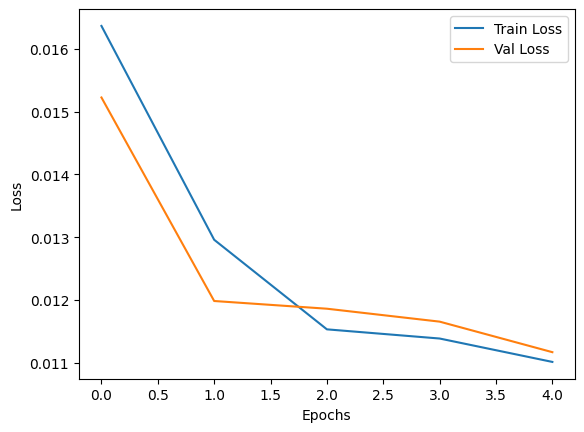

In [27]:
import segmentation_models_pytorch as smp

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = smp.Unet(
    encoder_name="resnet34",
    encoder_weights="imagenet",
    in_channels=3,
    classes=3
).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()


trainer = Trainer(model, train_loader, val_loader, test_loader, device)
trainer.run(epochs=5)